## Датасет

### Concrete Compressive Strength

https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

### Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

### Summary Statistics:

Number of instances (observations): 1030  
Number of Attributes: 9  
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable  
Missing Attribute Values: None  

### Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable  
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable  
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable  
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable  
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable  
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable  
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable  
Age -- quantitative -- Day (1~365) -- Input Variable  
Concrete compressive strength -- quantitative -- MPa -- Output Variable   

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [6]:
cement_df=pd.read_csv(r'./Concrete Compressive Strength.csv')
cement_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
cement_df.shape

(1030, 9)

In [8]:
cement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
cement_df.columns=["cement","slag","ash","water","superplasticizer","coarse_agg","fine_agg","age","compressive_strength"]
cement_df.head()

,cement,slag,ash,water,superplasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Подготовка

Нет сильного разброса по значениям, нет категориальных значений - принял решение не трогать данные

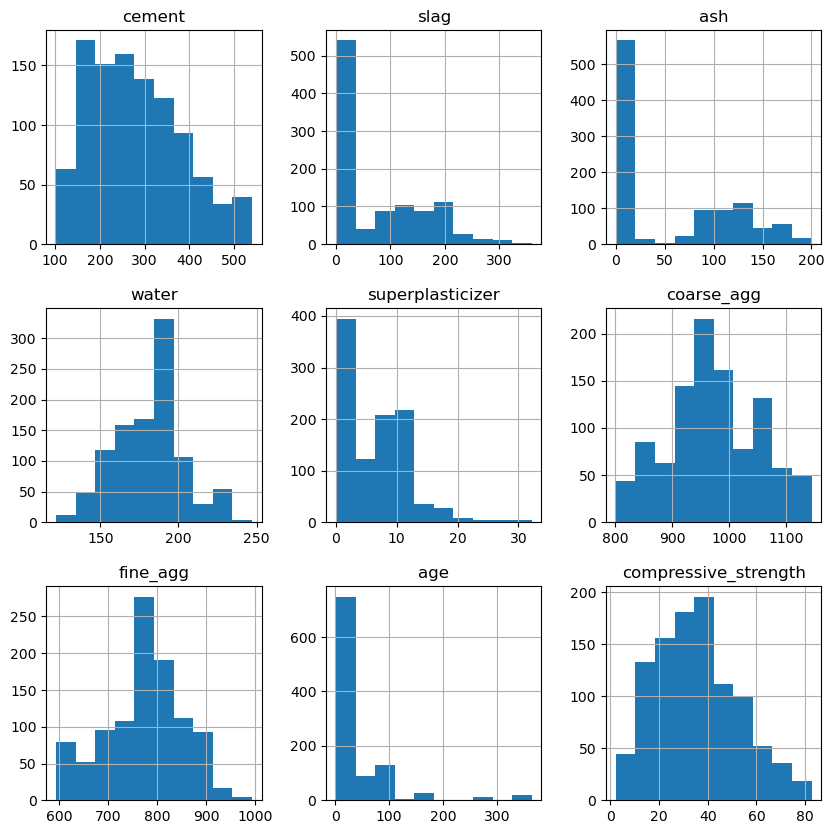

In [11]:
cement_df.hist(figsize=(10,10))
plt.show()

## Корреляция

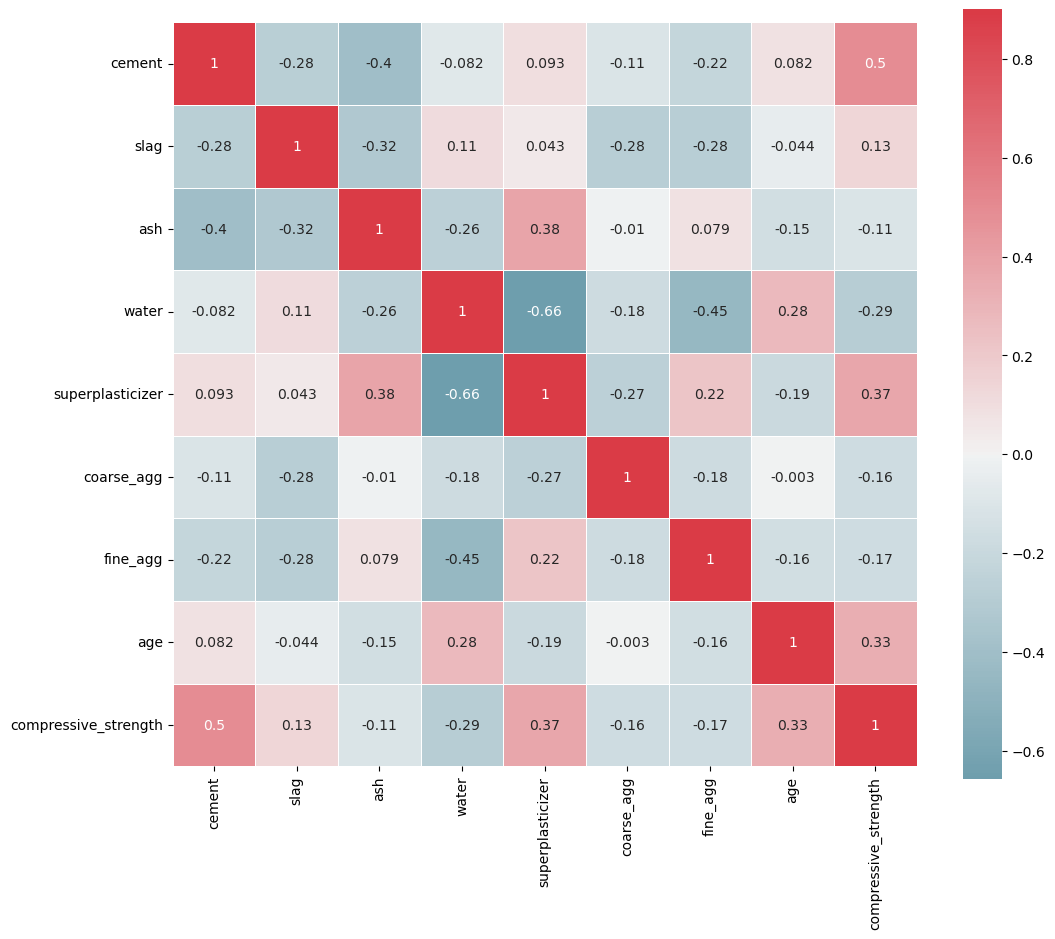

In [20]:
corr = cement_df.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, annot=True)
plt.show()

## Подбор параметров модели

Gridsearch, выбор лучшего по score

In [22]:
cement_df_f=cement_df.copy()

cement_X=cement_df_f.iloc[:,:-1]
cement_Y=cement_df_f.iloc[:,-1]

cement_train_X,cement_test_X,cement_train_Y,cement_test_Y=\
train_test_split(cement_X,cement_Y,test_size=0.3,random_state=42)

print(cement_train_X.shape)
print(cement_test_X.shape)

(721, 8)
(309, 8)


In [25]:
activation_f_l=["logistic","tanh","relu"]
lr_start_l=[0.1,0.05,0.02]
hidden_layer_l=[(50,30,20),(40,20,10),(30,15,5)]

mlp_regr_grid={"hidden_layer_sizes":hidden_layer_l, "activation":activation_f_l,"learning_rate_init":lr_start_l}

mlp_regr = MLPRegressor(random_state=42,solver='adam',early_stopping=True,max_iter=1000)

mlp_reg_cv_search = GridSearchCV(mlp_regr, mlp_regr_grid,scoring='neg_root_mean_squared_error',cv=5)

In [26]:
mlp_reg_cv_search.fit(cement_train_X,cement_train_Y)

GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    random_state=42),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 30, 20), (40, 20, 10),
                                                (30, 15, 5)],
                         'learning_rate_init': [0.1, 0.05, 0.02]},
             scoring='neg_root_mean_squared_error')

In [27]:
print("Best parameters set:",mlp_reg_cv_search.best_params_)
print("Best score:",mlp_reg_cv_search.best_score_)

Best parameters set: {'activation': 'relu', 'hidden_layer_sizes': (30, 15, 5), 'learning_rate_init': 0.02}
Best score: -7.005878135720503


## Лучшая модель

In [28]:
mlp_reg_best=MLPRegressor(random_state=42,solver='adam',early_stopping=True,max_iter=2000,
                          activation="relu",
                         hidden_layer_sizes=(30, 15, 5),learning_rate_init=0.02)
mlp_reg_best.fit(cement_train_X,cement_train_Y)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(30, 15, 5),
             learning_rate_init=0.02, max_iter=2000, random_state=42)

In [29]:
pred_train_Y=mlp_reg_best.predict(cement_train_X)
pred_test_Y=mlp_reg_best.predict(cement_test_X)


## Оценка

RMSE for Train set: 6.363832548378525
RMSE for Test set: 6.637797589471164
R2 for Train set: 0.8316424433975109
R2 for Test set: 0.7923857865206566


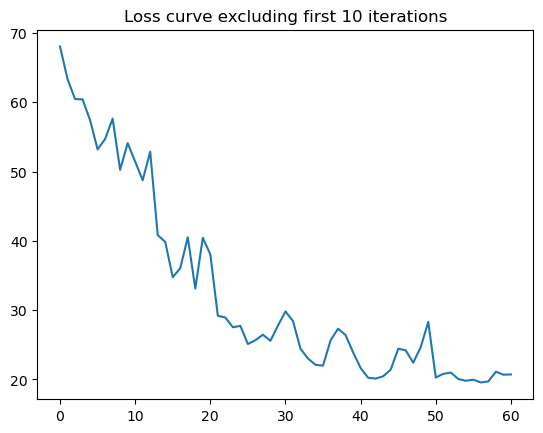

In [30]:
print("RMSE for Train set:",MSE(pred_train_Y,cement_train_Y,squared=False))
print("RMSE for Test set:",MSE(pred_test_Y,cement_test_Y,squared=False))

print("R2 for Train set:",r2_score(pred_train_Y,cement_train_Y))
print("R2 for Test set:",r2_score(pred_test_Y,cement_test_Y))

plt.plot(np.array(mlp_reg_best.loss_curve_[10:]))
plt.title("Loss curve excluding first 10 iterations")
plt.show()

## Результат

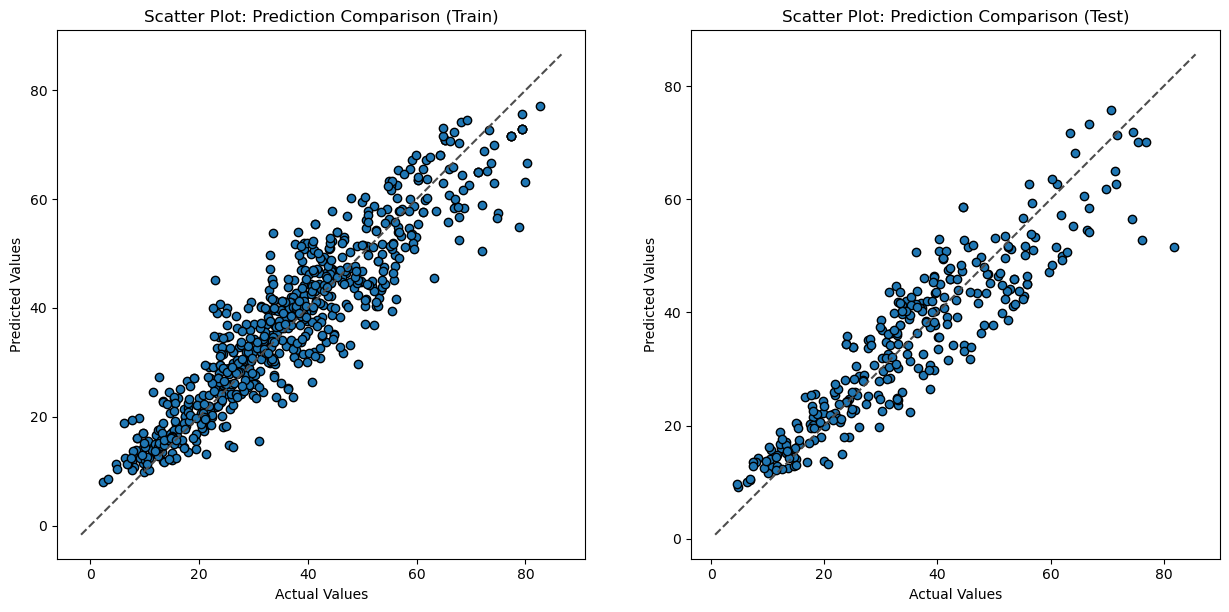

In [33]:
actual_y=[cement_train_Y,cement_test_Y]
y_predict=[pred_train_Y,pred_test_Y]
title_label= ["Scatter Plot: Prediction Comparison (Train)","Scatter Plot: Prediction Comparison (Test)"]

fig,ax=plt.subplots(1,len(actual_y),figsize=(15,15))
for i,col in enumerate(actual_y,0):
    ax[i].plot(np.ravel(actual_y[i]),
               np.ravel(y_predict[i]),'o',markeredgecolor="black")
    ax[i].set_title(title_label[i])
    ax[i].set_xlabel('Actual Values')
    ax[i].set_ylabel('Predicted Values')
    ax[i].set(aspect='equal')
    x=ax[i].get_xlim()
    y=ax[i].get_xlim()
    ax[i].plot(x,y, ls="--", c=".3")

plt.show()